<a href="https://colab.research.google.com/github/PrathameshMahore/FODS-Codes/blob/main/FODSassign6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [61]:
df = pd.read_csv('heart.csv', delimiter=',')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [62]:
print("\nMissing Values Count by Column:")
print(df.isnull().sum())


Missing Values Count by Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [63]:
for column in df.select_dtypes(include=['object']).columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        # Handle columns that cannot be converted to numeric (e.g., categorical)
        pass

df.fillna(df.median(), inplace=True)

In [64]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for col in categorical_columns:
    df[col] = df[col].astype('category')


In [65]:
df.drop_duplicates(inplace=True)

In [66]:
df = df[(df['age'] >= 18) & (df['age'] <= 100)]
df = df[(df['chol'] >= 100) & (df['chol'] <= 500)]

In [67]:
print("\nCleaned Dataset Overview:")
print(df.head())


Cleaned Dataset Overview:
   age sex cp  trestbps  chol fbs restecg  thalach exang  oldpeak slope ca  \
0   63   1  3       145   233   1       0      150     0      2.3     0  0   
1   37   1  2       130   250   0       1      187     0      3.5     0  0   
2   41   0  1       130   204   0       0      172     0      1.4     2  0   
3   56   1  1       120   236   0       1      178     0      0.8     2  0   
4   57   0  0       120   354   0       1      163     1      0.6     2  0   

  thal target  
0    1      1  
1    2      1  
2    2      1  
3    2      1  
4    2      1  


In [68]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              age    trestbps        chol     thalach     oldpeak
count  301.000000  301.000000  301.000000  301.000000  301.000000
mean    54.378738  131.657807  245.445183  149.534884    1.041196
std      9.033793   17.566422   48.479011   22.933737    1.162940
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     48.000000  120.000000  211.000000  133.000000    0.000000
50%     55.000000  130.000000  240.000000  152.000000    0.800000
75%     61.000000  140.000000  274.000000  166.000000    1.600000
max     77.000000  200.000000  417.000000  202.000000    6.200000


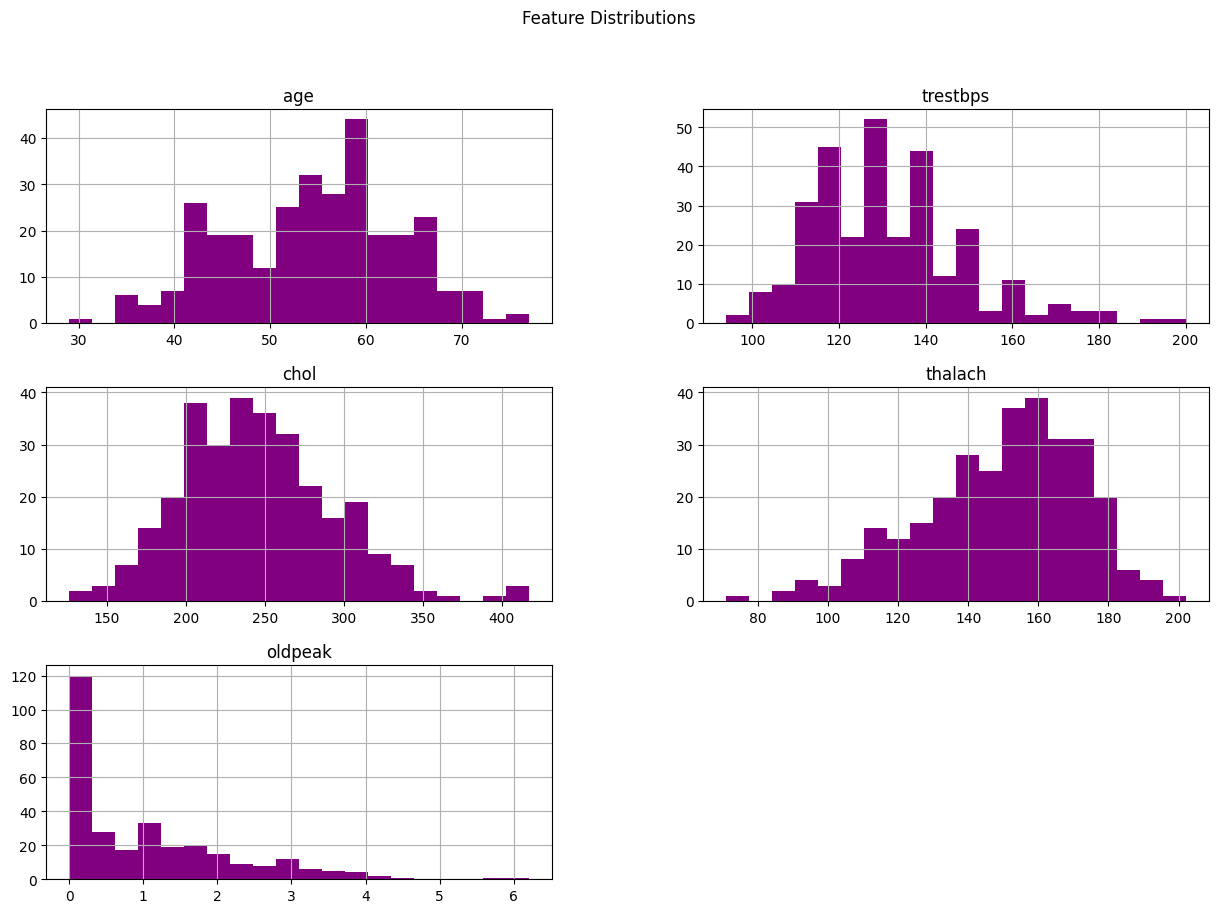

In [69]:
# 1. Histograms for each feature
df.hist(bins=20, figsize=(15, 10), color='purple')
plt.suptitle("Feature Distributions")
plt.show()

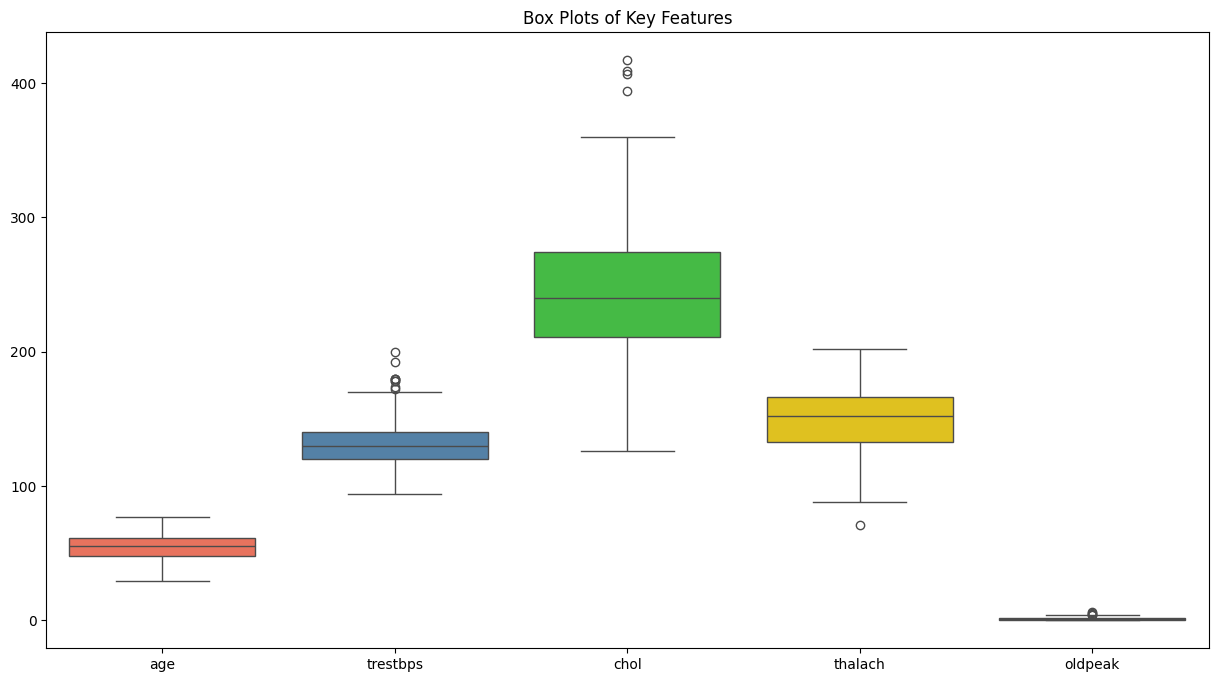

In [70]:
# 2. Box plots for key features to visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[["age", "trestbps", "chol", "thalach", "oldpeak"]], palette=["#FF6347", "#4682B4", "#32CD32", "#FFD700", "#8A2BE2"])
plt.title("Box Plots of Key Features")
plt.show()

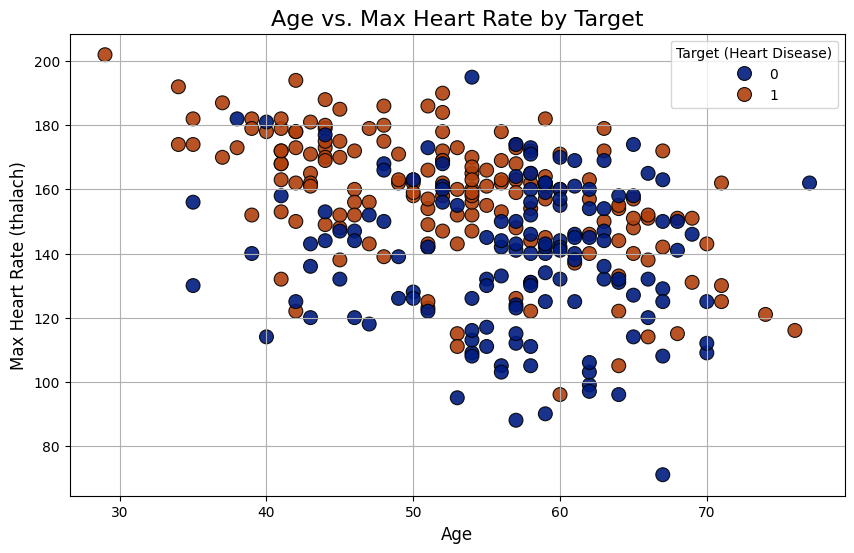

In [71]:
# 3. Scatter plot to analyze age vs. maximum heart rate (thalach)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='age',
    y='thalach',
    hue='target',
    data=df,
    palette='dark',
    edgecolor='black',
    s=100,
    alpha=0.9
)
plt.title("Age vs. Max Heart Rate by Target", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Max Heart Rate (thalach)", fontsize=12)
plt.legend(title="Target (Heart Disease)", loc='upper right', fontsize=10)
plt.grid(True)
plt.show()


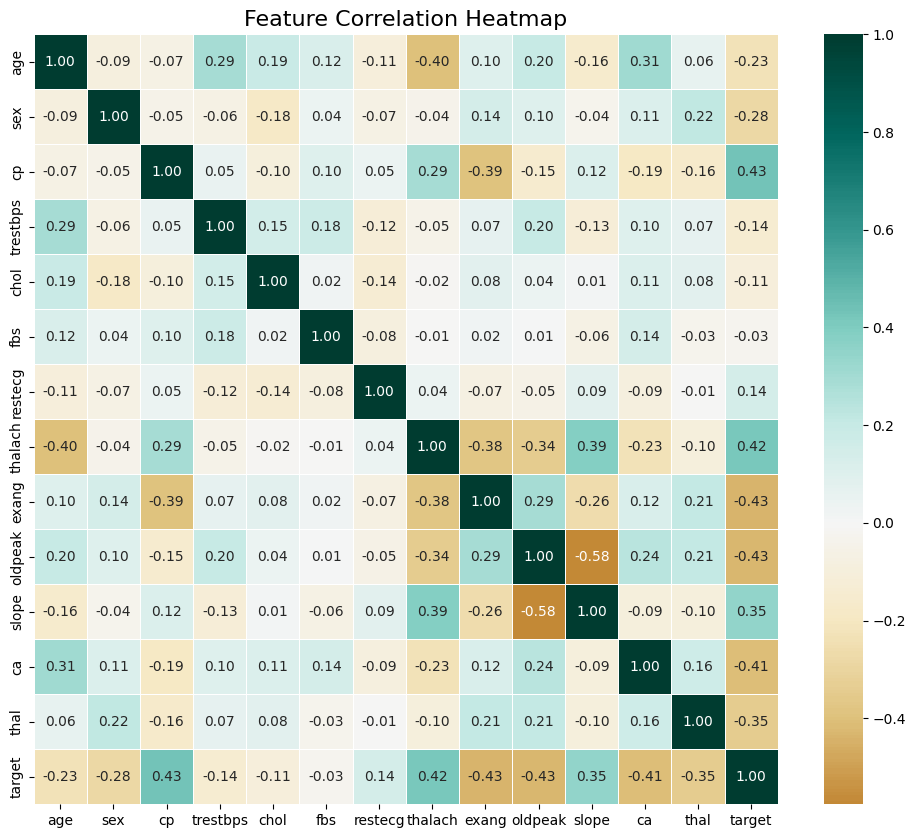

In [72]:
# 4. Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG', fmt='.2f', linewidths=0.5, center=0)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()


<ipython-input-73-b91ae93de9e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='magma', alpha=0.85)  # Changed to a 'magma' palette for better contrast


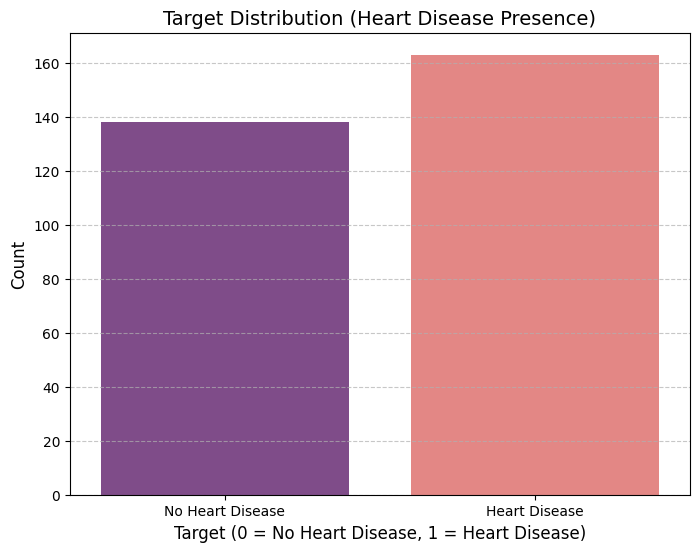

In [73]:
# 5. Count plot for the target variable to understand class balance
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='magma', alpha=0.85)  # Changed to a 'magma' palette for better contrast
plt.title("Target Distribution (Heart Disease Presence)", fontsize=14)
plt.xlabel("Target (0 = No Heart Disease, 1 = Heart Disease)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'], fontsize=10)  # Added custom x-tick labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added a horizontal grid for better readability
plt.show()


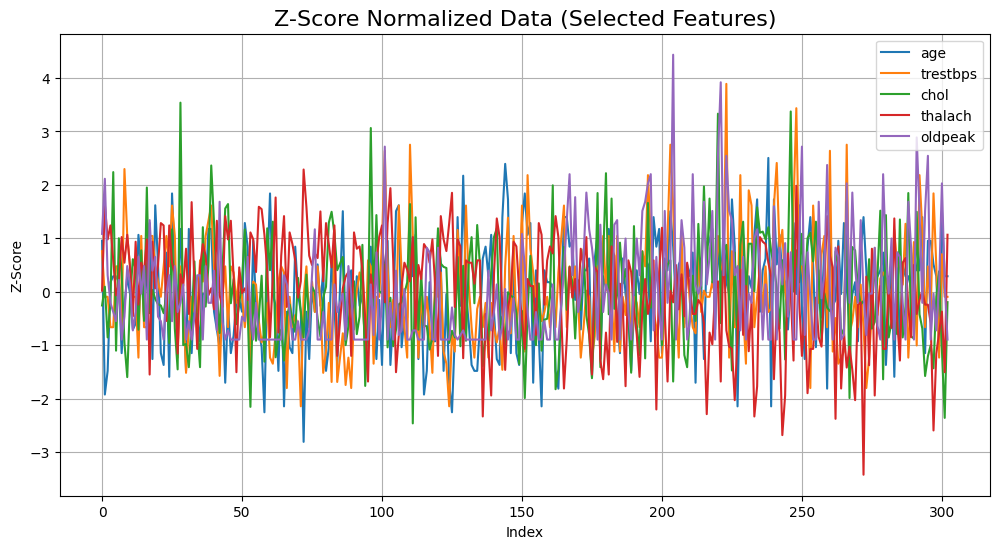

In [74]:
# Select only numerical features for Z-score scaling
numerical_features = df.select_dtypes(include=['number']).columns
df_ZScaled = pd.DataFrame((df[numerical_features] - df[numerical_features].mean()) / df[numerical_features].std(),
                         columns=numerical_features,
                         index=df.index)
categorical_features = df.select_dtypes(exclude=['number']).columns
df_ZScaled = pd.concat([df_ZScaled, df[categorical_features]], axis=1)
plt.figure(figsize=(12, 6))
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.plot(df_ZScaled[selected_features])
plt.title('Z-Score Normalized Data (Selected Features)', fontsize=16)
plt.xlabel('Index')
plt.ylabel('Z-Score')
plt.legend(selected_features, loc='upper right')
plt.grid(True)
plt.show()
